## Data Cleaning - Testing.csv

The techniques used here are similar to the techniques I used to clean training dataset. 

In [4]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

pd.set_option("display.max_columns", None)

In [10]:
#reading traning.csv
df = pd.DataFrame(pd.read_csv('test.csv'))
print(df)

        RefId   PurchDate  Auction  VehYear  VehicleAge       Make  \
0       73015   12/2/2009    ADESA     2005           4    PONTIAC   
1       73016   12/2/2009    ADESA     2005           4  CHEVROLET   
2       73017   12/2/2009    ADESA     2006           3      DODGE   
3       73018   12/2/2009    ADESA     2002           7     SATURN   
4       73019   12/2/2009    ADESA     2007           2    HYUNDAI   
...       ...         ...      ...      ...         ...        ...   
48702  121742  11/17/2010  MANHEIM     2005           5       FORD   
48703  121743  11/17/2010  MANHEIM     2007           3     TOYOTA   
48704  121744  11/17/2010  MANHEIM     2006           4        KIA   
48705  121745  11/17/2010  MANHEIM     2005           5      MAZDA   
48706  121746  11/17/2010  MANHEIM     2003           7      BUICK   

                Model Trim                SubModel   Color Transmission  \
0          GRAND PRIX  Bas                4D SEDAN  SILVER         AUTO   
1        

In [6]:
#Get unique values of some of the categorical features

print('Unique values of the following feature columns \n')
print('Auction: ', df.Auction.unique(), '\n', df['Auction'].value_counts())
print('\n')
#print('Make: ', df.Make.unique(), '\n', df['Make'].value_counts()) 
#print('Model: ', df.Model.unique(), '\n', df['Model'].value_counts()) // High cardinality
#print('SubModel: ', df.SubModel.unique(), '\n', df['SubModel'].value_counts())
#print('Trim: ', df.SubModel.unique(), '\n', df['Trim'].value_counts())
print('Transmission: ', df.Transmission.unique(), '\n', df['Transmission'].value_counts())
print('\n')
print('WheelType: ', df.WheelType.unique(), '\n', df['WheelType'].value_counts())
print('\n')
print('Nationality: ', df.Nationality.unique(), '\n', df['Nationality'].value_counts())
print('\n')
print('Size: ', df.Size.unique(), '\n', df['Size'].value_counts())
print('\n')
print('TopThreeAmericanName: ', df.TopThreeAmericanName.unique(), '\n', df['TopThreeAmericanName'].value_counts())
print('\n')
print('PRIMEUNIT: ', df.PRIMEUNIT.unique(), '\n', df['PRIMEUNIT'].value_counts())
print('\n')
print('AUCGUART: ', df.AUCGUART.unique(), '\n', df['AUCGUART'].value_counts())
print('\n')
#print('VNZIP1: ', df.VNZIP1.unique(), '\n', df['VNZIP1'].value_counts())
#print('VNST: ', df.VNST.unique(), '\n', df['VNST'].value_counts())
#print('\n')
print('IsOnlineSale: ', df.IsOnlineSale.unique(), '\n', df['IsOnlineSale'].value_counts())
print('\n')

Unique values of the following feature columns 

Auction:  ['ADESA' 'OTHER' 'MANHEIM'] 
 MANHEIM    27736
ADESA      12994
OTHER       7977
Name: Auction, dtype: int64


Transmission:  ['AUTO' 'MANUAL' nan] 
 AUTO      47010
MANUAL     1694
Name: Transmission, dtype: int64


WheelType:  ['Alloy' nan 'Covers' 'Special'] 
 Alloy      25443
Covers     20651
Special      425
Name: WheelType, dtype: int64


Nationality:  ['AMERICAN' 'OTHER ASIAN' 'TOP LINE ASIAN' 'OTHER' nan] 
 AMERICAN          40413
OTHER ASIAN        5838
TOP LINE ASIAN     2326
OTHER               123
Name: Nationality, dtype: int64


Size:  ['LARGE' 'MEDIUM' 'MEDIUM SUV' 'COMPACT' 'VAN' 'CROSSOVER' 'SMALL SUV'
 'LARGE SUV' 'LARGE TRUCK' 'SPORTS' 'SPECIALTY' 'SMALL TRUCK' nan] 
 MEDIUM         20361
LARGE           5711
MEDIUM SUV      5453
COMPACT         4881
VAN             4042
LARGE TRUCK     2069
SMALL SUV       1575
SPECIALTY       1446
CROSSOVER       1286
LARGE SUV        868
SPORTS           516
SMALL TRUCK   

In [7]:
#Imputate missing values or remove rows or columns if NaN values are significantly higher

print(df.isna().sum())

RefId                                    0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1550
SubModel                                 5
Color                                    4
Transmission                             3
WheelTypeID                           2188
WheelType                             2188
VehOdo                                   0
Nationality                              7
Size                                     7
TopThreeAmericanName                     7
MMRAcquisitionAuctionAveragePrice       10
MMRAcquisitionAuctionCleanPrice         10
MMRAcquisitionRetailAveragePrice        10
MMRAcquisitonRetailCleanPrice           10
MMRCurrentAuctionAveragePrice          143
MMRCurrentAuctionCleanPrice            143
MMRCurrentR

In [11]:
df=df.drop(['PRIMEUNIT','AUCGUART'],axis=1)

In [12]:
#Filling NaN values of WheelType and WheelTypeID
#'Alloy' is mapped to '1', 'Covers' to '2' and Special to '3'

Dict_WheelType = {'Alloy':1,'Covers':2,'Special':3}

# print('Number of elements which are null in WheelTypeID (before): ', df.WheelTypeID.isna().sum())
# df.WheelTypeID = df.WheelTypeID.fillna(df.WheelType.map(Dict_WheelType))
# print('Number of elements which are null in WheelTypeID (after): ', df.WheelTypeID.isna().sum()

#I already have WheelTypeID, so the categorical features: 'WheelType' is not required. Thus, removing it from the main dataframe
df=df.drop(['WheelType'],axis=1)

In [13]:
df2 = df[df['WheelTypeID'].isnull()]
print('Total Null values of WheelTypeID: ', len(df2.index))
df3 = df[~df.index.isin(df2.index)]

#print(len(df3.index))
df4 = pd.merge(df2,df3, how='left', on=['Make','Model','SubModel','Trim','Transmission','VehYear','Nationality','TopThreeAmericanName','Size'])
#print(len(df4.index))

df5=df4[['Make','Model','SubModel','Trim','Transmission','VehYear','Nationality','TopThreeAmericanName','Size','WheelTypeID_y']]
df5=df5.drop_duplicates(subset=['Make','Model','SubModel','Trim','Transmission','VehYear','Nationality','TopThreeAmericanName','Size'])
#print(len(df5.index))

#print(df5)

Total Null values of WheelTypeID:  2188


In [14]:
#print(len(df.index))
df_x = pd.merge(df,df5, how='left', on=['Make','Model','SubModel','Trim','Transmission','VehYear','Nationality','TopThreeAmericanName','Size'])
df_x.WheelTypeID.fillna(df_x.WheelTypeID_y, inplace=True)

print('Null values of WheelTypeID earlier: ', df.WheelTypeID.isna().sum())
print('Null values of WheelTypeID now: ', df_x.WheelTypeID.isna().sum())
df_x = df_x.drop(['WheelTypeID_y'],axis=1)
#print(len(df_x.index))
#print(df_x)

Null values of WheelTypeID earlier:  2188
Null values of WheelTypeID now:  97


In [15]:
df2 = df_x[df_x['WheelTypeID'].isnull()]
#print('Total Null values of WheelTypeID: ', len(df2.index))
df3 = df_x[~df_x.index.isin(df2.index)]

#print(len(df3.index))
df4 = pd.merge(df2,df3, how='left', on=['Make','Model'])
#print(len(df4.index))

df5=df4[['Make','Model','WheelTypeID_y']]
df5=df5.drop_duplicates(subset=['Make','Model'])
#print(len(df5.index))

df_y = pd.merge(df_x,df5, how='left', on=['Make','Model'])
df_y.WheelTypeID.fillna(df_y.WheelTypeID_y, inplace=True)

print('Null values of WheelTypeID earlier: ', df_x.WheelTypeID.isna().sum())
print('Null values of WheelTypeID now: ', df_y.WheelTypeID.isna().sum())
df_y = df_y.drop(['WheelTypeID_y'],axis=1)

Null values of WheelTypeID earlier:  97
Null values of WheelTypeID now:  9


In [16]:
#print(df_y.WheelTypeID.isna().sum())
#print(df_y)
df2 = df_y[df_y['WheelTypeID'].isnull()]
print(df2)

#Since '1' is the minority class, we shouldn't remove these rows.

        RefId   PurchDate  Auction  VehYear  VehicleAge       Make  \
37      73052  12/16/2009    ADESA     2004           5      LEXUS   
5807    78824   7/30/2009    ADESA     2001           8   CHRYSLER   
6705    79723    2/5/2009    ADESA     2005           4        KIA   
7242    80260   1/20/2009    ADESA     2007           2     SUZUKI   
32344  105373    4/1/2009  MANHEIM     2002           7       FORD   
34515  107546   5/13/2009    OTHER     2002           7     SUZUKI   
38569  111600   12/7/2010    OTHER     2002           8      DODGE   
40596  113628  11/10/2010    OTHER     2002           8  CHEVROLET   
46001  119038   8/25/2009  MANHEIM     2004           5    PONTIAC   

                      Model Trim                        SubModel   Color  \
37                RX330 FWD  NaN                4D SPORT UTILITY    GOLD   
5807   CONCORDE 3.2L V6 EFI  LXi                    4D SEDAN LXI    BLUE   
6705   SPECTRA 5 2.0L I4 EF   SX                     4D SEDAN EX    BLU

In [17]:
unique_Make_values_df2 = df2.Make.unique()
print(unique_Make_values_df2)

dict_a={}

df3 = df_y[df_y['WheelTypeID'].notna()]
for x in unique_Make_values_df2:
    df4 = df3[df3['Make']==str(x)]
    if len(df4.index)==0:
        print('empty')
        continue
    dict_a[x]=df4['WheelTypeID'].value_counts().idxmax()
    
    
print(dict_a)   
    

['LEXUS' 'CHRYSLER' 'KIA' 'SUZUKI' 'FORD' 'DODGE' 'CHEVROLET' 'PONTIAC']
{'LEXUS': 1.0, 'CHRYSLER': 2.0, 'KIA': 2.0, 'SUZUKI': 2.0, 'FORD': 1.0, 'DODGE': 2.0, 'CHEVROLET': 2.0, 'PONTIAC': 1.0}


In [18]:
#df_y.WheelTypeID.fillna(df_y.apply(lambda row: row['']))

print('Number of null values of WheelTypeID earlier: ', df_y.WheelTypeID.isna().sum())

# def function1(x):
#     return dict_a[x]

df_y['WheelTypeID'] = df_y.apply(
    lambda row: dict_a[row['Make']] if np.isnan(row['WheelTypeID']) else row['WheelTypeID'],
    axis=1
)

print('Number of null values of WheelTypeID now: ', df_y.WheelTypeID.isna().sum())

Number of null values of WheelTypeID earlier:  9
Number of null values of WheelTypeID now:  0


In [19]:
### Filling Nan values of SubModel

df2 = df_y[df_y['SubModel'].isnull()]
#print(df2)
df3 = df_y[~df_y.index.isin(df2.index)]

df4 = pd.merge(df2,df3, how='left', on=['Make','Model','Trim'])
#print(df4)

df5=df4[['Make','Model','Trim','SubModel_y']]
df6 = df5.drop_duplicates()
#print(df6)

df6=df6.drop_duplicates(subset=['Make','Model','Trim'])
print(df6)

          Make                 Model Trim        SubModel_y
0        ISUZU  ASCENDER 2WD 6C 4.2L  Lux     SPORT UTILITY
13   CHEVROLET   EQUINOX AWD V6 3.4L   LS         4D SUV LS
47   CHEVROLET  MALIBU 4C 2.2L I4 MP  Cla  4D SEDAN CLASSIC
254      DODGE  CARAVAN GRAND FWD V6   SE      MINIVAN 3.3L
657    PONTIAC     G6 V6 3.5L V6 SFI  Bas          4D SEDAN


In [20]:
db1 = pd.merge(df_y,df6, how='left', on=['Make','Model','Trim'])
print('Number of null values of SubModel earlier: ', db1.SubModel.isna().sum())
db1.SubModel.fillna(db1.SubModel_y, inplace=True)
print('Number of null values of SubModel now: ', db1.SubModel.isna().sum())
# print(df2[['Make','Model','Trim','SubModel']])
#print(db1)

Number of null values of SubModel earlier:  5
Number of null values of SubModel now:  0


In [21]:
db1 = db1.drop(['SubModel_y'],axis=1)
#print(db1)

In [22]:
## Filling Nan values of Trim 

df2 = db1[db1['Trim'].isnull()]
# # #print(df2)
df3 = db1[~db1.index.isin(df2.index)]

df4 = pd.merge(df2,df3, how='left', on=['Make','Model','SubModel'])
# #print(df4)

df5=df4[['Make','Model','SubModel','Trim_y']]
df6 = df5.drop_duplicates()
#print(df6)

df6=df6.drop_duplicates(subset=['Make','Model','SubModel'])
print(len(df6.index))

# Each trim levels has different features and higher trim levels offer more equipment

155


In [23]:
db2 = pd.merge(db1,df6, how='left', on=['Make','Model','SubModel'])
print('Number of null values of Trim earlier: ', db2.Trim.isna().sum())
db2.Trim.fillna(db2.Trim_y, inplace=True)
print('Number of null values of Trim now: ', db2.Trim.isna().sum())


Number of null values of Trim earlier:  1550
Number of null values of Trim now:  598


In [24]:
#Dropping 'Trim'
db2 = db2.drop(['Trim_y'],axis=1)

In [25]:
## Filling Nan values of Transmission feature
print(db2.Transmission.unique())

db2["Transmission"].replace({"Manual": "MANUAL"}, inplace=True)
print(db2.Transmission.unique())

['AUTO' 'MANUAL' nan]
['AUTO' 'MANUAL' nan]


In [26]:
df2 = db2[db2['Transmission'].isnull()]
# # #print(df2)
df3 = db2[~db2.index.isin(df2.index)]

df4 = pd.merge(df2,df3, how='left', on=['Make','Model','SubModel'])
# #print(df4)

df5=df4[['Make','Model','SubModel','Transmission_y']]
df6 = df5.drop_duplicates()
#print(df6)

df6=df6.drop_duplicates(subset=['Make','Model','SubModel'])
print(len(df6.index))


3


In [27]:
db3 = pd.merge(db2,df6, how='left', on=['Make','Model','SubModel'])
print('Number of null values of Transmission earlier: ', db3.Transmission.isna().sum())
db3.Transmission.fillna(db3.Transmission_y, inplace=True)
print('Number of null values of Transmission now: ', db3.Transmission.isna().sum())


Number of null values of Transmission earlier:  3
Number of null values of Transmission now:  0


In [28]:
db3 = db3.drop(['Transmission_y'],axis=1)

In [29]:
## Fillin Nan values of Nationality

df2 = db3[db3['Nationality'].isnull()]
# # #print(df2)
df3 = db3[~db3.index.isin(df2.index)]

df4 = pd.merge(df2,df3, how='left', on=['Make','Model','SubModel'])
# #print(df4)

df5=df4[['Make','Model','SubModel','Nationality_y']]
df6 = df5.drop_duplicates()
#print(df6)

df6=df6.drop_duplicates(subset=['Make','Model','SubModel'])
print(len(df6.index))

7


In [30]:
db4 = pd.merge(db3,df6, how='left', on=['Make','Model','SubModel'])
print('Number of null values in Nationality earlier: ', db4.Nationality.isna().sum())
db4.Nationality.fillna(db4.Nationality_y, inplace=True)
print('Number of null values in Nationality now: ', db4.Nationality.isna().sum())

Number of null values in Nationality earlier:  7
Number of null values in Nationality now:  1


In [31]:
db4 = db4.drop(['Nationality_y'],axis=1)

In [32]:
df2 = db3[db3['Nationality'].isnull()]
# # #print(df2)
df3 = db3[~db3.index.isin(df2.index)]

df4 = pd.merge(df2,df3, how='left', on=['Make'])
# #print(df4)

df5=df4[['Make','Nationality_y']]
df6 = df5.drop_duplicates()
#print(df6)

df6=df6.drop_duplicates(subset=['Make'])
print(len(df6.index))

4


In [33]:
db5 = pd.merge(db4,df6, how='left', on=['Make'])
print('Number of null values in Nationality earlier: ', db5.Nationality.isna().sum())
db5.Nationality.fillna(db5.Nationality_y, inplace=True)
print('Number of null values in Nationality now: ', db5.Nationality.isna().sum())

Number of null values in Nationality earlier:  1
Number of null values in Nationality now:  0


In [34]:
db5=db5.drop(['Nationality_y'],axis=1)

In [35]:
## Filling Nan values of Size feature

df2 = db5[db5['Size'].isnull()]
# # #print(df2)
df3 = db5[~db5.index.isin(df2.index)]

df4 = pd.merge(df2,df3, how='left', on=['Make','Model','SubModel','Trim'])
# #print(df4)

df5=df4[['Make','Model','SubModel','Trim','Size_y']]
df6 = df5.drop_duplicates()
#print(df6)

df6=df6.drop_duplicates(subset=['Make','Model','SubModel','Trim'])
print(len(df6.index))

7


In [36]:
db6 = pd.merge(db5,df6, how='left', on=['Make','Model','SubModel','Trim'])
print('Number of null values in Size earlier: ', db6.Size.isna().sum())
db6.Size.fillna(db6.Size_y, inplace=True)
print('Number of null values in Size now: ', db6.Size.isna().sum())

Number of null values in Size earlier:  7
Number of null values in Size now:  1


In [37]:
db6 = db6.drop(['Size_y'],axis=1)

In [38]:
df2 = db6[db6['Size'].isnull()]
# # #print(df2)
df3 = db6[~db6.index.isin(df2.index)]

df4 = pd.merge(df2,df3, how='left', on=['Make','Model'])
# #print(df4)

df5=df4[['Make','Model','Size_y']]
df6 = df5.drop_duplicates()
#print(df6)

df6=df6.drop_duplicates(subset=['Make','Model'])
print(len(df6.index))

db7 = pd.merge(db6,df6, how='left', on=['Make','Model'])
print('Number of null values in Size earlier: ', db7.Size.isna().sum())
db7.Size.fillna(db7.Size_y, inplace=True)
print('Number of null values in Size now: ', db7.Size.isna().sum())


1
Number of null values in Size earlier:  1
Number of null values in Size now:  0


In [39]:
db7 = db7.drop(['Size_y'],axis=1)

In [40]:
### Filling Nan values of TopThreeAmericanName

df2 = db7[db7['TopThreeAmericanName'].isnull()]
print(len(df2.index))
#print(df2)

df2.loc[df2['Nationality'] != 'AMERICAN', 'TopThreeAmericanName'] = 'OTHER'

df2.loc[df2['Make'] == 'DODGE', 'TopThreeAmericanName'] = 'CHRYSLER'
df2.loc[df2['Make'] == 'JEEP', 'TopThreeAmericanName'] = 'CHRYSLER'
df2.loc[df2['Make'] == 'GMC', 'TopThreeAmericanName'] = 'GM'


print(df2)


7
       RefId   PurchDate  Auction  VehYear  VehicleAge     Make  \
2082   75097  12/16/2009    ADESA     2008           1    DODGE   
20588  93611  10/23/2009  MANHEIM     2005           4    DODGE   
20589  93612  10/23/2009  MANHEIM     2003           6   NISSAN   
20594  93617  10/23/2009  MANHEIM     2005           4  PONTIAC   
20595  93618  10/23/2009  MANHEIM     2003           6    DODGE   
20597  93620  10/23/2009  MANHEIM     2007           2  HYUNDAI   
20600  93623  10/23/2009  MANHEIM     2006           3  HYUNDAI   

                      Model Trim         SubModel   Color Transmission  \
2082           NITRO 4WD V6  SXT   4D SUV 3.7L SE   BLACK         AUTO   
20588      NEON 2.0L I4 SFI  SXT         4D SEDAN  SILVER       MANUAL   
20589    ALTIMA 2.5L I4 EFI  Bas       4D SEDAN S     RED         AUTO   
20594   GRAND AM V6 3.4L V6   SE      4D SEDAN SE    GOLD         AUTO   
20595   DURANGO 4WD V8 4.7L  Spo  4D SUV 4.7L SLT  SILVER         AUTO   
20597  SONATA 4C 

C:\Users\Shreya Pamecha\anaconda3\envs\new_env\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [41]:
print('Number of null values in TopThreeAmericanName earlier: ', db7.TopThreeAmericanName.isna().sum())
df3 = df2[['RefId','TopThreeAmericanName']]
db8 = pd.merge(db7,df3,how='left',on=['RefId'])
# print(db8)
db8.TopThreeAmericanName_x.fillna(db8.TopThreeAmericanName_y, inplace=True)
db8=db8.rename(columns = {'TopThreeAmericanName_x':'TopThreeAmericanName'})
db8=db8.drop(['TopThreeAmericanName_y'],axis=1)

print('Number of null values in TopThreeAmericanName now: ', db8.TopThreeAmericanName.isna().sum())

Number of null values in TopThreeAmericanName earlier:  7
Number of null values in TopThreeAmericanName now:  1


In [42]:
### Filling Nan values in MMRCurrent & MMR Acquisition

## Correlation between MMRCurrentAuctionAveragePrice & MMRAcquisitionAuctionAveragePrice
print('The correlation between MMRCurrentAuctionAveragePrice and MMRAcquisitionAuctionAveragePrice: ', db8['MMRCurrentAuctionAveragePrice'].corr(db8['MMRAcquisitionAuctionAveragePrice']))
print('The correlation between MMRCurrentAuctionCleanPrice and MMRAcquisitionAuctionCleanPrice: ', db8['MMRCurrentAuctionCleanPrice'].corr(db8['MMRAcquisitionAuctionCleanPrice']))
print('The correlation between MMRCurrentRetailAveragePrice and MMRAcquisitionRetailAveragePrice: ', db8['MMRCurrentRetailAveragePrice'].corr(db8['MMRAcquisitionRetailAveragePrice']))
print('The correlation between MMRCurrentRetailCleanPrice and MMRAcquisitonRetailCleanPrice: ', db8['MMRCurrentRetailCleanPrice'].corr(db8['MMRAcquisitonRetailCleanPrice']))

db8.corr(method ='pearson')


The correlation between MMRCurrentAuctionAveragePrice and MMRAcquisitionAuctionAveragePrice:  0.9443624975733471
The correlation between MMRCurrentAuctionCleanPrice and MMRAcquisitionAuctionCleanPrice:  0.9382807817743865
The correlation between MMRCurrentRetailAveragePrice and MMRAcquisitionRetailAveragePrice:  0.9172761676947685
The correlation between MMRCurrentRetailCleanPrice and MMRAcquisitonRetailCleanPrice:  0.9107612899077585


,RefId,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
RefId,1.000000,-0.039264,0.055183,0.028305,0.058431,-0.019399,-0.013001,0.006748,0.009849,-0.030208,-0.024448,-0.014905,-0.011545,0.010702,0.000706,-0.016101,0.063749,0.061813
VehYear,-0.039264,1.000000,-0.958120,0.232921,-0.233143,0.600271,0.558270,0.603267,0.567349,0.606592,0.570824,0.617156,0.582526,0.259802,0.086821,0.357490,0.088840,-0.259559
VehicleAge,0.055183,-0.958120,1.000000,-0.223253,0.268429,-0.589122,-0.549229,-0.484953,-0.457291,-0.596486,-0.560274,-0.528541,-0.499302,-0.248833,-0.083555,-0.322993,-0.055683,0.248907
WheelTypeID,0.028305,0.232921,-0.223253,1.000000,-0.175176,-0.095463,-0.124252,-0.073501,-0.098334,-0.092951,-0.120077,-0.078742,-0.102634,0.150851,0.037651,-0.166758,0.016384,-0.116259
VehOdo,0.058431,-0.233143,0.268429,-0.175176,1.000000,0.016184,0.049369,0.062389,0.087185,0.005038,0.037203,0.045244,0.070156,-0.226039,-0.073537,-0.050155,0.023667,0.407507
MMRAcquisitionAuctionAveragePrice,-0.019399,0.600271,-0.589122,-0.095463,0.016184,1.000000,0.991088,0.909831,0.910947,0.944362,0.939032,0.879644,0.878711,0.095599,0.011607,0.778955,0.065248,-0.055368
MMRAcquisitionAuctionCleanPrice,-0.013001,0.558270,-0.549229,-0.124252,0.049369,0.991088,1.000000,0.902004,0.917683,0.931459,0.938281,0.869373,0.878252,0.061021,0.003673,0.770688,0.060973,-0.028727
MMRAcquisitionRetailAveragePrice,0.006748,0.603267,-0.484953,-0.073501,0.062389,0.909831,0.902004,1.000000,0.990494,0.856929,0.854521,0.917276,0.909691,0.097438,0.014657,0.737857,0.104219,-0.061335
MMRAcquisitonRetailCleanPrice,0.009849,0.567349,-0.457291,-0.098334,0.087185,0.910947,0.917683,0.990494,1.000000,0.854036,0.861258,0.908767,0.910761,0.070431,0.007143,0.736174,0.098510,-0.037104
MMRCurrentAuctionAveragePrice,-0.030208,0.606592,-0.596486,-0.092951,0.005038,0.944362,0.931459,0.856929,0.854036,1.000000,0.991223,0.916349,0.914017,0.102493,0.016591,0.766453,0.067180,-0.056798


In [44]:
# There are 18 Null values in all MMRAcuisition features. Let's fill those first.

df2=db8[db8['MMRCurrentAuctionAveragePrice'].isnull() & db8['MMRCurrentAuctionCleanPrice'].isnull() & db8['MMRCurrentRetailAveragePrice'].isnull() & db8['MMRCurrentRetailCleanPrice'].isnull() & db8['MMRAcquisitionAuctionAveragePrice'].isnull() & db8['MMRAcquisitionAuctionCleanPrice'].isnull() & db8['MMRAcquisitionRetailAveragePrice'].isnull() & db8['MMRAcquisitonRetailCleanPrice'].isnull()]
print(len(df2.index))

df3 = db8[~db8.index.isin(df2.index)]
#print(df3)
df4_a = df3[['VehBCost','WarrantyCost','VehicleAge','VehYear','WheelTypeID','MMRAcquisitionAuctionAveragePrice']]
# df4_b = df3[['VehBCost','WarrantyCost','VehicleAge','VehYear','IsBadBuy','WheelTypeID','MMRAcquisitionAuctionCleanPrice']]
# df4_c = df3[['VehBCost','WarrantyCost','VehicleAge','VehYear','IsBadBuy','WheelTypeID','MMRAcquisitionRetailAveragePrice']]
# df4_d = df3[['VehBCost','WarrantyCost','VehicleAge','VehYear','IsBadBuy','WheelTypeID','MMRAcquisitonRetailCleanPrice']]

10


In [45]:
x_a = df4_a[['VehBCost','WarrantyCost','VehicleAge','WheelTypeID']]
y_a = df4_a[['MMRAcquisitionAuctionAveragePrice']]

x_train, x_test, y_train, y_test = train_test_split(x_a, y_a, test_size = 0.3)

model_a = LinearRegression()
model_a.fit(x_train,y_train)
# print(model_a.coef_)
prediction_a = model_a.predict(x_test)
print('MSE: ', metrics.mean_absolute_error(y_test, prediction_a))
print(model_a.coef_)

MSE:  814.312456755971
[[ 8.79385046e-01  2.77980323e-01 -6.01218467e+02 -3.51703402e+02]]


In [46]:
## Filling Nan values of all MMRAcuisition features

model_a2 = LinearRegression()
model_a2.fit(x_a,y_a)

x_a2 = df2[['VehBCost','WarrantyCost','VehicleAge','WheelTypeID']]
y_a2 = df2[['MMRAcquisitionAuctionAveragePrice']]

prediction_a2 = model_a2.predict(x_a2)
# print(prediction_a2)

x_a2['MMRAcquisitionAuctionAveragePrice'] = prediction_a2
x_a2 = x_a2[['MMRAcquisitionAuctionAveragePrice']]

# print(x_a2)

print('Number of null values in MMRAcquisitionAuctionAveragePrice earlier: ', db8.MMRAcquisitionAuctionAveragePrice.isna().sum())
db9 = pd.merge(db8, x_a2, how='left',left_index=True,right_index=True)
# print(db9)

db9.MMRAcquisitionAuctionAveragePrice_x.fillna(db9.MMRAcquisitionAuctionAveragePrice_y, inplace=True)
db9=db9.rename(columns = {'MMRAcquisitionAuctionAveragePrice_x':'MMRAcquisitionAuctionAveragePrice'})
db9=db9.drop(['MMRAcquisitionAuctionAveragePrice_y'],axis=1)

print('Number of null values in MMRAcquisitionAuctionAveragePrice now: ', db9.MMRAcquisitionAuctionAveragePrice.isna().sum())

Number of null values in MMRAcquisitionAuctionAveragePrice earlier:  10
Number of null values in MMRAcquisitionAuctionAveragePrice now:  0


<ipython-input-46-4de8c0c6ba6e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_a2['MMRAcquisitionAuctionAveragePrice'] = prediction_a2


In [47]:
### Similarily filling MMRAcquisitionAuctionCleanPrice, MMRAcquisitionRetailAveragePrice & MMRAcquisitonRetailCleanPrice

df2=db9[db9['MMRAcquisitionAuctionCleanPrice'].isnull()]
# print(len(df2.index))

df3 = db9[~db9.index.isin(df2.index)]
# print(len(df3.index))

df4_b = df3[['VehBCost','WarrantyCost','VehicleAge','VehYear','WheelTypeID','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice']]

x_b = df4_b[['VehBCost','WarrantyCost','VehicleAge','WheelTypeID','MMRAcquisitionAuctionAveragePrice']]
y_b = df4_b[['MMRAcquisitionAuctionCleanPrice']]

x_train, x_test, y_train, y_test = train_test_split(x_b, y_b, test_size = 0.3)

model_b = LinearRegression()
model_b.fit(x_train,y_train)
# print(model_a.coef_)
prediction_b = model_b.predict(x_test)
print('MSE: ', metrics.mean_absolute_error(y_test, prediction_b))
# print(model_a.coef_)


MSE:  251.8372918114624


In [49]:
## Filling Nan values of MMRAcquisitionAuctionCleanPrice feature

model_b2 = LinearRegression()
model_b2.fit(x_b,y_b)

x_b2 = df2[['VehBCost','WarrantyCost','VehicleAge','WheelTypeID','MMRAcquisitionAuctionAveragePrice']]
y_b2 = df2[['MMRAcquisitionAuctionCleanPrice']]

prediction_b2 = model_b2.predict(x_b2)
# print(prediction_a2)

x_b2['MMRAcquisitionAuctionCleanPrice'] = prediction_b2
x_b2 = x_b2[['MMRAcquisitionAuctionCleanPrice']]
# print(x_a2)

print('Number of null values in MMRAcquisitionAuctionCleanPrice earlier: ', db1.MMRAcquisitionAuctionCleanPrice.isna().sum())
db10 = pd.merge(db9, x_b2, how='left',left_index=True,right_index=True)
# print(db9)

db10.MMRAcquisitionAuctionCleanPrice_x.fillna(db10.MMRAcquisitionAuctionCleanPrice_y, inplace=True)
db10=db10.rename(columns = {'MMRAcquisitionAuctionCleanPrice_x':'MMRAcquisitionAuctionCleanPrice'})
db10=db10.drop(['MMRAcquisitionAuctionCleanPrice_y'],axis=1)

print('Number of null values in MMRAcquisitionAuctionCleanPrice now: ', db10.MMRAcquisitionAuctionCleanPrice.isna().sum())

Number of null values in MMRAcquisitionAuctionCleanPrice earlier:  10
Number of null values in MMRAcquisitionAuctionCleanPrice now:  0


<ipython-input-49-3de7d4858323>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_b2['MMRAcquisitionAuctionCleanPrice'] = prediction_b2


In [50]:
df2=db10[db10['MMRAcquisitionRetailAveragePrice'].isnull()]
print(len(df2.index))

df3 = db10[~db10.index.isin(df2.index)]
print(len(df3.index))

df4_c = df3[['VehBCost','WarrantyCost','VehicleAge','WheelTypeID','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice']]

x_c = df4_c[['VehBCost','WarrantyCost','VehicleAge','WheelTypeID','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice']]
y_c = df4_c[['MMRAcquisitionRetailAveragePrice']]

x_train, x_test, y_train, y_test = train_test_split(x_c, y_c, test_size = 0.3)

model_c = LinearRegression()
model_c.fit(x_train,y_train)
# print(model_a.coef_)
prediction_c = model_c.predict(x_test)
print('MSE: ', metrics.mean_absolute_error(y_test, prediction_c))
# print(model_a.coef_)


10
48697
MSE:  1183.7936447112959


In [51]:
## Filling Nan values of MMRAcquisitionRetailAveragePrice feature

model_c2 = LinearRegression()
model_c2.fit(x_c,y_c)

x_c2 = df2[['VehBCost','WarrantyCost','VehicleAge','WheelTypeID','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice']]
y_c2 = df2[['MMRAcquisitionRetailAveragePrice']]

prediction_c2 = model_c2.predict(x_c2)
# print(prediction_a2)

x_c2['MMRAcquisitionRetailAveragePrice'] = prediction_c2
x_c2 = x_c2[['MMRAcquisitionRetailAveragePrice']]

# # print(x_a2)

print('Number of null values in MMRAcquisitionRetailAveragePrice earlier: ', db10.MMRAcquisitionRetailAveragePrice.isna().sum())
db11 = pd.merge(db10, x_c2, how='left',left_index=True,right_index=True)
# # print(db9)

db11.MMRAcquisitionRetailAveragePrice_x.fillna(db11.MMRAcquisitionRetailAveragePrice_y, inplace=True)
db11=db11.rename(columns = {'MMRAcquisitionRetailAveragePrice_x':'MMRAcquisitionRetailAveragePrice'})
db11=db11.drop(['MMRAcquisitionRetailAveragePrice_y'],axis=1)

print('Number of null values in MMRAcquisitionRetailAveragePrice now: ', db11.MMRAcquisitionRetailAveragePrice.isna().sum())

Number of null values in MMRAcquisitionRetailAveragePrice earlier:  10
Number of null values in MMRAcquisitionRetailAveragePrice now:  0


<ipython-input-51-734e330bd005>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_c2['MMRAcquisitionRetailAveragePrice'] = prediction_c2


In [53]:
df2=db11[db11['MMRAcquisitonRetailCleanPrice'].isnull()]
print(len(df2.index))

df3 = db11[~db11.index.isin(df2.index)]
print(len(df3.index))

df4_d = df3[['VehBCost','WarrantyCost','VehicleAge','WheelTypeID','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice']]

x_d = df4_d[['VehBCost','WarrantyCost','VehicleAge','WheelTypeID','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice']]
y_d = df4_d[['MMRAcquisitonRetailCleanPrice']]

x_train, x_test, y_train, y_test = train_test_split(x_d, y_d, test_size = 0.3)

model_d = LinearRegression()
model_d.fit(x_train,y_train)
# print(model_a.coef_)
prediction_d = model_d.predict(x_test)
print('MSE: ', metrics.mean_absolute_error(y_test, prediction_d))
# print(model_a.coef_)


10
48697
MSE:  154.4357107458906


In [54]:
## Filling Nan values of MMRAcquisitonRetailCleanPrice feature

model_d2 = LinearRegression()
model_d2.fit(x_d,y_d)

x_d2 = df2[['VehBCost','WarrantyCost','VehicleAge','WheelTypeID','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice']]
y_d2 = df2[['MMRAcquisitonRetailCleanPrice']]

prediction_d2 = model_d2.predict(x_d2)
# print(prediction_a2)

x_d2['MMRAcquisitonRetailCleanPrice'] = prediction_d2
x_d2 = x_d2[['MMRAcquisitonRetailCleanPrice']]

# # print(x_a2)

print('Number of null values in MMRAcquisitonRetailCleanPrice earlier: ', db11.MMRAcquisitonRetailCleanPrice.isna().sum())
db12 = pd.merge(db11, x_d2, how='left',left_index=True,right_index=True)
# # print(db9)

db12.MMRAcquisitonRetailCleanPrice_x.fillna(db12.MMRAcquisitonRetailCleanPrice_y, inplace=True)
db12=db12.rename(columns = {'MMRAcquisitonRetailCleanPrice_x':'MMRAcquisitonRetailCleanPrice'})
db12=db12.drop(['MMRAcquisitonRetailCleanPrice_y'],axis=1)

print('Number of null values in MMRAcquisitonRetailCleanPrice now: ', db12.MMRAcquisitonRetailCleanPrice.isna().sum())

Number of null values in MMRAcquisitonRetailCleanPrice earlier:  10
Number of null values in MMRAcquisitonRetailCleanPrice now:  0


<ipython-input-54-039153930bf3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_d2['MMRAcquisitonRetailCleanPrice'] = prediction_d2


In [56]:
### Similarily filling Nan values of MMRCurrentAuctionAveragePrice, MMRCurrentAuctionCleanPrice, MMRCurrentRetailAveragePrice & MMRCurrentRetailCleanPrice

df2=db12[db12['MMRCurrentAuctionAveragePrice'].isnull()]
print(len(df2.index))

df3 = db12[~db12.index.isin(df2.index)]
print(len(df3.index))

df4_a = df3[['VehBCost','WarrantyCost','VehicleAge','MMRAcquisitionAuctionAveragePrice','MMRCurrentAuctionAveragePrice']]

x_a = df4_a[['VehBCost','WarrantyCost','VehicleAge','MMRAcquisitionAuctionAveragePrice']]
y_a = df4_a[['MMRCurrentAuctionAveragePrice']]

x_train, x_test, y_train, y_test = train_test_split(x_a, y_a, test_size = 0.3)

model_a = LinearRegression()
model_a.fit(x_train,y_train)
# print(model_a.coef_)
prediction_a = model_a.predict(x_test)
print('MSE: ', metrics.mean_absolute_error(y_test, prediction_a))
# print(model_a.coef_)


143
48564
MSE:  485.29800918339396


In [57]:
## Filling Nan values of MMRCurrentAuctionAveragePrice feature

model_a2 = LinearRegression()
model_a2.fit(x_a,y_a)

x_a2 = df2[['VehBCost','WarrantyCost','VehicleAge','MMRAcquisitionAuctionAveragePrice']]
y_a2 = df2[['MMRCurrentAuctionAveragePrice']]

prediction_a2 = model_a2.predict(x_a2)
# print(prediction_a2)

x_a2['MMRCurrentAuctionAveragePrice'] = prediction_a2
x_a2 = x_a2[['MMRCurrentAuctionAveragePrice']]

# # print(x_a2)

print('Number of null values in MMRCurrentAuctionAveragePrice earlier: ', db12.MMRCurrentAuctionAveragePrice.isna().sum())
db13 = pd.merge(db12, x_a2, how='left',left_index=True,right_index=True)
# # print(db9)

db13.MMRCurrentAuctionAveragePrice_x.fillna(db13.MMRCurrentAuctionAveragePrice_y, inplace=True)
db13=db13.rename(columns = {'MMRCurrentAuctionAveragePrice_x':'MMRCurrentAuctionAveragePrice'})
db13=db13.drop(['MMRCurrentAuctionAveragePrice_y'],axis=1)

print('Number of null values in MMRCurrentAuctionAveragePrice now: ', db13.MMRCurrentAuctionAveragePrice.isna().sum())

Number of null values in MMRCurrentAuctionAveragePrice earlier:  143
Number of null values in MMRCurrentAuctionAveragePrice now:  0


<ipython-input-57-2e85270aa3e2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_a2['MMRCurrentAuctionAveragePrice'] = prediction_a2


In [58]:
df2=db13[db13['MMRCurrentAuctionCleanPrice'].isnull()]
print(len(df2.index))

df3 = db13[~db13.index.isin(df2.index)]
print(len(df3.index))

df4_b = df3[['VehBCost','WarrantyCost','VehicleAge','MMRAcquisitionAuctionCleanPrice','MMRCurrentAuctionCleanPrice']]

x_b = df4_b[['VehBCost','WarrantyCost','VehicleAge','MMRAcquisitionAuctionCleanPrice']]
y_b = df4_b[['MMRCurrentAuctionCleanPrice']]

x_train, x_test, y_train, y_test = train_test_split(x_b, y_b, test_size = 0.3)

model_b = LinearRegression()
model_b.fit(x_train,y_train)
# print(model_a.coef_)
prediction_b = model_b.predict(x_test)
print('MSE: ', metrics.mean_absolute_error(y_test, prediction_b))
# print(model_a.coef_)


143
48564
MSE:  564.9539042265


In [59]:
## Filling Nan values of MMRCurrentAuctionCleanPrice feature

model_b2 = LinearRegression()
model_b2.fit(x_b,y_b)

x_b2 = df2[['VehBCost','WarrantyCost','VehicleAge','MMRAcquisitionAuctionCleanPrice']]
y_b2 = df2[['MMRCurrentAuctionCleanPrice']]

prediction_b2 = model_b2.predict(x_b2)
# print(prediction_a2)

x_b2['MMRCurrentAuctionCleanPrice'] = prediction_b2
x_b2 = x_b2[['MMRCurrentAuctionCleanPrice']]

# # print(x_a2)

print('Number of null values in MMRCurrentAuctionCleanPrice earlier: ', db13.MMRCurrentAuctionCleanPrice.isna().sum())
db14 = pd.merge(db13, x_b2, how='left',left_index=True,right_index=True)
# # print(db9)

db14.MMRCurrentAuctionCleanPrice_x.fillna(db14.MMRCurrentAuctionCleanPrice_y, inplace=True)
db14=db14.rename(columns = {'MMRCurrentAuctionCleanPrice_x':'MMRCurrentAuctionCleanPrice'})
db14=db14.drop(['MMRCurrentAuctionCleanPrice_y'],axis=1)

print('Number of null values in MMRCurrentAuctionCleanPrice now: ', db14.MMRCurrentAuctionCleanPrice.isna().sum())

Number of null values in MMRCurrentAuctionCleanPrice earlier:  143
Number of null values in MMRCurrentAuctionCleanPrice now:  0


<ipython-input-59-de905c01effa>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_b2['MMRCurrentAuctionCleanPrice'] = prediction_b2


In [60]:
df2=db14[db14['MMRCurrentRetailAveragePrice'].isnull()]
print(len(df2.index))

df3 = db14[~db14.index.isin(df2.index)]
print(len(df3.index))

df4_c = df3[['VehBCost','WarrantyCost','VehicleAge','MMRAcquisitionRetailAveragePrice','MMRCurrentRetailAveragePrice']]

x_c = df4_c[['VehBCost','WarrantyCost','VehicleAge','MMRAcquisitionRetailAveragePrice']]
y_c = df4_c[['MMRCurrentRetailAveragePrice']]

x_train, x_test, y_train, y_test = train_test_split(x_c, y_c, test_size = 0.3)

model_c = LinearRegression()
model_c.fit(x_train,y_train)
# print(model_a.coef_)
prediction_c = model_c.predict(x_test)
print('MSE: ', metrics.mean_absolute_error(y_test, prediction_c))
# print(model_a.coef_)


143
48564
MSE:  788.3307492616948


In [61]:
## Filling Nan values of MMRCurrentRetailAveragePrice feature

model_c2 = LinearRegression()
model_c2.fit(x_c,y_c)

x_c2 = df2[['VehBCost','WarrantyCost','VehicleAge','MMRAcquisitionRetailAveragePrice']]
y_c2 = df2[['MMRCurrentRetailAveragePrice']]

prediction_c2 = model_c2.predict(x_c2)
# print(prediction_a2)

x_c2['MMRCurrentRetailAveragePrice'] = prediction_c2
x_c2 = x_c2[['MMRCurrentRetailAveragePrice']]

# # print(x_a2)

print('Number of null values in MMRCurrentRetailAveragePrice earlier: ', db14.MMRCurrentRetailAveragePrice.isna().sum())
db15 = pd.merge(db14, x_c2, how='left',left_index=True,right_index=True)
# # print(db9)

db15.MMRCurrentRetailAveragePrice_x.fillna(db15.MMRCurrentRetailAveragePrice_y, inplace=True)
db15=db15.rename(columns = {'MMRCurrentRetailAveragePrice_x':'MMRCurrentRetailAveragePrice'})
db15=db15.drop(['MMRCurrentRetailAveragePrice_y'],axis=1)

print('Number of null values in MMRCurrentRetailAveragePrice now: ', db15.MMRCurrentRetailAveragePrice.isna().sum())

Number of null values in MMRCurrentRetailAveragePrice earlier:  143
Number of null values in MMRCurrentRetailAveragePrice now:  0


<ipython-input-61-6bfd3983f7c4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_c2['MMRCurrentRetailAveragePrice'] = prediction_c2


In [62]:
df2=db15[db15['MMRCurrentRetailCleanPrice'].isnull()]
print(len(df2.index))

df3 = db15[~db15.index.isin(df2.index)]
print(len(df3.index))

df4_d = df3[['VehBCost','WarrantyCost','VehicleAge','MMRAcquisitonRetailCleanPrice','MMRCurrentRetailCleanPrice']]

x_d = df4_d[['VehBCost','WarrantyCost','VehicleAge','MMRAcquisitonRetailCleanPrice']]
y_d = df4_d[['MMRCurrentRetailCleanPrice']]

x_train, x_test, y_train, y_test = train_test_split(x_d, y_d, test_size = 0.3)

model_d = LinearRegression()
model_d.fit(x_train,y_train)
# print(model_a.coef_)
prediction_d = model_d.predict(x_test)
print('MSE: ', metrics.mean_absolute_error(y_test, prediction_d))
# print(model_a.coef_)


143
48564
MSE:  855.5925105636042


In [63]:
## Filling Nan values of MMRCurrentRetailCleanPrice feature

model_d2 = LinearRegression()
model_d2.fit(x_d,y_d)

x_d2 = df2[['VehBCost','WarrantyCost','VehicleAge','MMRAcquisitonRetailCleanPrice']]
y_d2 = df2[['MMRCurrentRetailCleanPrice']]

prediction_d2 = model_d2.predict(x_d2)
# print(prediction_a2)

x_d2['MMRCurrentRetailCleanPrice'] = prediction_d2
x_d2 = x_d2[['MMRCurrentRetailCleanPrice']]

# # print(x_a2)

print('Number of null values in MMRCurrentRetailCleanPrice earlier: ', db15.MMRCurrentRetailCleanPrice.isna().sum())
db16 = pd.merge(db15, x_d2, how='left',left_index=True,right_index=True)
# # print(db9)

db16.MMRCurrentRetailCleanPrice_x.fillna(db16.MMRCurrentRetailCleanPrice_y, inplace=True)
db16=db16.rename(columns = {'MMRCurrentRetailCleanPrice_x':'MMRCurrentRetailCleanPrice'})
db16=db16.drop(['MMRCurrentRetailCleanPrice_y'],axis=1)

print('Number of null values in MMRCurrentRetailCleanPrice now: ', db16.MMRCurrentRetailCleanPrice.isna().sum())

Number of null values in MMRCurrentRetailCleanPrice earlier:  143
Number of null values in MMRCurrentRetailCleanPrice now:  0


<ipython-input-63-9726d3c78cd0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_d2['MMRCurrentRetailCleanPrice'] = prediction_d2


In [64]:
db = db16.copy()


['SILVER' 'GOLD' 'BLUE' 'GREEN' 'BROWN' 'WHITE' 'RED' 'GREY' 'BEIGE'
 'BLACK' 'ORANGE' 'MAROON' 'PURPLE' 'YELLOW' 'NOT AVAIL' 'OTHER' 'PINK'
 nan]
Number of null values in Color earlier:  4
Number of null values in Color now:  0


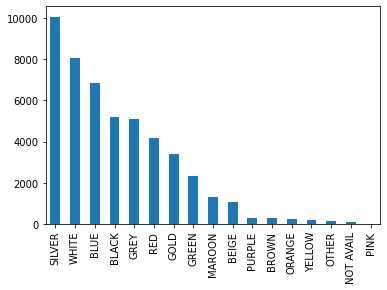

In [65]:
# print(db.Color.unique())

unique_values_Color = db.Color.unique()
print(unique_values_Color) #since it has more than one unique element, we can't simply remove this feature
count = db['Color'].value_counts()
# print(count)

fig, ax = plt.subplots()
db['Color'].value_counts().plot(ax=ax, kind='bar')

print('Number of null values in Color earlier: ', db.Color.isna().sum())

# db['Color'] = db['Color'].fillna(np.random.choice(db['Color'].values.tolist()))
unique_values_Color = unique_values_Color[:-1]

db['Color'] = db['Color'].fillna(pd.Series(np.random.choice(unique_values_Color, size=len(db.index))))
print('Number of null values in Color now: ', db.Color.isna().sum())


# df2 = db.groupby('Color')['IsBadBuy'].sum()
# df3 = db.groupby('Color')['RefId'].count()

# df4 = pd.merge(df2, df3, left_index=True, right_index=True)
# df4.columns = ['Number_of_bad_buy','Total_buy']

# df4['Percentage_of_bad_buy'] = (df4['Number_of_bad_buy']/df4['Total_buy'])*100


In [74]:
db.TopThreeAmericanName.fillna('OTHER', inplace=True)
# db

In [72]:
print(db.isna().sum())

## Still need to fill Nan values for 'Trim' features

RefId                                  0
PurchDate                              0
Auction                                0
VehYear                                0
VehicleAge                             0
Make                                   0
Model                                  0
Trim                                 598
SubModel                               0
Color                                  0
Transmission                           0
WheelTypeID                            0
VehOdo                                 0
Nationality                            0
Size                                   0
TopThreeAmericanName                   0
MMRAcquisitionAuctionAveragePrice      0
MMRAcquisitionAuctionCleanPrice        0
MMRAcquisitionRetailAveragePrice       0
MMRAcquisitonRetailCleanPrice          0
MMRCurrentAuctionAveragePrice          0
MMRCurrentAuctionCleanPrice            0
MMRCurrentRetailAveragePrice           0
MMRCurrentRetailCleanPrice             0
BYRNO           

In [75]:
db = db.drop(['Trim','VNST','VehYear','RefId'],axis=1)


In [79]:
#Creating some extra features
db['MMR_diff_AuctionAveragePrice'] = db['MMRAcquisitionAuctionAveragePrice']-db['MMRCurrentAuctionAveragePrice']
db['MMR_diff_AuctionCleanPrice'] = db['MMRAcquisitionAuctionCleanPrice']-db['MMRCurrentAuctionCleanPrice']
db['MMR_diff_RetailAveragePrice'] = db['MMRAcquisitionRetailAveragePrice']-db['MMRCurrentRetailAveragePrice']
db['MMR_diff_RetailCleanPrice'] = db['MMRAcquisitonRetailCleanPrice']-db['MMRCurrentRetailCleanPrice']


db['Purch_year'] = pd.DatetimeIndex(db['PurchDate']).year
db['Purch_month'] = pd.DatetimeIndex(db['PurchDate']).month
db['Purch_date'] = pd.DatetimeIndex(db['PurchDate']).day




In [77]:
db = db.drop(['PurchDate'],axis=1)

In [80]:
db

,Auction,VehicleAge,Make,Model,SubModel,Color,Transmission,WheelTypeID,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,Purch_year,Purch_month,Purch_date,MMR_diff_AuctionAveragePrice,MMR_diff_AuctionCleanPrice,MMR_diff_RetailAveragePrice,MMR_diff_RetailCleanPrice
0,ADESA,4,PONTIAC,GRAND PRIX,4D SEDAN,SILVER,AUTO,1.0,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,18881,30212,6500.0,0,2152,2009,12,2,127.0,205.0,-2622.0,-2355.0
1,ADESA,4,CHEVROLET,MALIBU V6,4D SEDAN LS,SILVER,AUTO,1.0,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,18111,30212,6300.0,0,1118,2009,12,2,-143.0,-25.0,-2200.0,-2656.0
2,ADESA,3,DODGE,DURANGO 2WD V8,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1.0,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,18111,30212,9700.0,0,1215,2009,12,2,-639.0,875.0,-3776.0,-1928.0
3,ADESA,7,SATURN,L SERIES,4D SEDAN L200,GOLD,AUTO,1.0,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,18881,30212,4150.0,0,1933,2009,12,2,-370.0,-65.0,-2462.0,-2073.0
4,ADESA,2,HYUNDAI,ACCENT,2D COUPE GS,BLUE,AUTO,2.0,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,18111,30212,4100.0,0,920,2009,12,2,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,MANHEIM,5,FORD,FIVE HUNDRED,4D SEDAN SEL,BLACK,AUTO,1.0,88645,AMERICAN,LARGE,FORD,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,20928,33411,7955.0,0,1633,2010,11,17,-403.0,-129.0,-777.0,-490.0
48703,MANHEIM,3,TOYOTA,COROLLA,4D SEDAN CE,GREEN,AUTO,2.0,81862,TOP LINE ASIAN,COMPACT,OTHER,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,20928,33411,7035.0,0,594,2010,11,17,-7.0,-191.0,716.0,456.0
48704,MANHEIM,4,KIA,SPECTRA,4D SEDAN EX,BLACK,AUTO,2.0,82451,OTHER ASIAN,MEDIUM,OTHER,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,20928,33411,6335.0,0,594,2010,11,17,-171.0,-201.0,101.0,180.0
48705,MANHEIM,5,MAZDA,MAZDA3,4D SEDAN GT,SILVER,AUTO,1.0,75760,OTHER ASIAN,MEDIUM,OTHER,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,20928,33411,8055.0,0,1038,2010,11,17,861.0,1313.0,561.0,2012.0


In [99]:
df_training = pd.read_csv('cleanedData.csv')

df_training_unique_values_model = df_training.Model.unique()
df_training_unique_values_submodel = df_training.SubModel.unique()
df_training_unique_values_make = df_training.Make.unique()
df_training_unique_values_color = df_training.Color.unique()

In [100]:
db2 = db[db.Model.isin(df_training_unique_values_model) & db.SubModel.isin(df_training_unique_values_submodel) & db.Make.isin(df_training_unique_values_make) & db.Color.isin(df_training_unique_values_color)]

In [101]:
db2

# db2 = pd.read_csv('cleanedData_test.csv')
# db2 = db2.drop(['Unnamed: 0','Purch_year.1','Purch_month.1','Purch_date.1'],axis=1)
# db2

,Auction,VehicleAge,Make,Model,SubModel,Color,Transmission,WheelTypeID,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,Purch_year,Purch_month,Purch_date,MMR_diff_AuctionAveragePrice,MMR_diff_AuctionCleanPrice,MMR_diff_RetailAveragePrice,MMR_diff_RetailCleanPrice
0,ADESA,4,PONTIAC,GRAND PRIX,4D SEDAN,SILVER,AUTO,1.0,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,18881,30212,6500.0,0,2152,2009,12,2,127.0,205.0,-2622.0,-2355.0
1,ADESA,4,CHEVROLET,MALIBU V6,4D SEDAN LS,SILVER,AUTO,1.0,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,18111,30212,6300.0,0,1118,2009,12,2,-143.0,-25.0,-2200.0,-2656.0
2,ADESA,3,DODGE,DURANGO 2WD V8,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1.0,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,18111,30212,9700.0,0,1215,2009,12,2,-639.0,875.0,-3776.0,-1928.0
3,ADESA,7,SATURN,L SERIES,4D SEDAN L200,GOLD,AUTO,1.0,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,18881,30212,4150.0,0,1933,2009,12,2,-370.0,-65.0,-2462.0,-2073.0
4,ADESA,2,HYUNDAI,ACCENT,2D COUPE GS,BLUE,AUTO,2.0,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,18111,30212,4100.0,0,920,2009,12,2,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,MANHEIM,5,FORD,FIVE HUNDRED,4D SEDAN SEL,BLACK,AUTO,1.0,88645,AMERICAN,LARGE,FORD,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,20928,33411,7955.0,0,1633,2010,11,17,-403.0,-129.0,-777.0,-490.0
48703,MANHEIM,3,TOYOTA,COROLLA,4D SEDAN CE,GREEN,AUTO,2.0,81862,TOP LINE ASIAN,COMPACT,OTHER,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,20928,33411,7035.0,0,594,2010,11,17,-7.0,-191.0,716.0,456.0
48704,MANHEIM,4,KIA,SPECTRA,4D SEDAN EX,BLACK,AUTO,2.0,82451,OTHER ASIAN,MEDIUM,OTHER,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,20928,33411,6335.0,0,594,2010,11,17,-171.0,-201.0,101.0,180.0
48705,MANHEIM,5,MAZDA,MAZDA3,4D SEDAN GT,SILVER,AUTO,1.0,75760,OTHER ASIAN,MEDIUM,OTHER,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,20928,33411,8055.0,0,1038,2010,11,17,861.0,1313.0,561.0,2012.0


In [102]:
db2.to_csv('dataframe_testing.csv')